In [411]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl  
import seaborn as sns
import numpy as np
import itertools
from scipy import stats
from emoji import UNICODE_EMOJI
from scipy.stats import norm, probplot, t
import statsmodels.api as sm
from pandas.core import datetools
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

Hipóteses

\begin{equation*}
   H_0:\mbox{Tem poucas meninas na engenharia por motivos externos} \rightarrow \mu_B=\mu_A \rightarrow \mu_B-\mu_A=0
\end{equation*}   
\begin{equation*}
   H_a:\mbox{Tem poucas meninas na engenharia por motivos internos} \rightarrow \mu_B\neq\mu_A \rightarrow \mu_B-\mu_A\neq0
\end{equation*}


Motivos externos: Mercado de trabalho, Salário, Vontade de outros
    
Motivos internos: Gosto por exatas/ curso

# 1a Análise: Faz ou não engenharia no Insper?

### Ler Arquivos Excel e colocar em um DataFrame

## PRIMEIRO SHEET : meninas na engenharia insper

Lendo arquivo Excel

In [412]:
eng_insper = pd.read_excel('PESQUISA.xlsx', sheet_name = 0)

Limpar o DataFrame e Renomear algumas colunas

In [413]:
eng_insper = eng_insper.rename(columns={"Qual seu nome completo?": "NOME", "Qual semestre?": "SEMESTRE", "Idade": "IDADE", "Qual engenharia?": "TIPO_ENG", "De onde você veio (cidade/estado)?": "ESTADO/CID", "Frequentou o Ensino Médio...":"TIPO_EM", "Qual o nome do seu colégio?": "NOME_EM", 'Insper foi sua 1a opcao?': 'Sua atual faculdade foi sua 1a opção?', 'Como descobriu o Insper?':'Como descobriu sua faculdade?', 'Por que Insper?': 'Por que escolheu sua faculdade?'})


semestre=[]

for k in eng_insper.SEMESTRE:
    if k == "2º Semestre":
        semestre.append(2)
    elif k == "3º Semestre":
        semestre.append(3)
    elif k == "4º Semstre":
        semestre.append(4)
    elif k =="5º Semestre":
        semestre.append(5)
    elif k =="6º semestre":
        semestre.append(6)
    elif k == "7º Semestre":
        semestre.append(7)
    else:
         semestre.append(8)
            
eng_insper.SEMESTRE = semestre


eng_insper['Se "Não", qual?'] = eng_insper['Se "Não", qual?'].fillna('Insper')

eng_insper['Se SIM na pergunta anterior,  quais familiares?'] = eng_insper['Se SIM na pergunta anterior,  quais familiares?'].fillna('Ninguém')

In [414]:
eng_insper['Fez Insper?']='Sim'


In [415]:
eng_insper_idx=eng_insper.set_index('NOME')

## SEGUNDO SHEET: engenharia de outras faculdades

Lendo arquivo Excel

In [416]:
eng_geral = pd.read_excel('PESQUISA.xlsx', sheet_name = 1)


Limpar o DataFrame e Renomear algumas colunas

In [417]:
eng_geral = eng_geral.rename(columns={"Qual seu nome completo?": "NOME", "Qual semestre?": "SEMESTRE", "Idade": "IDADE", "Qual engenharia?": "TIPO_ENG", "De onde você veio (cidade/estado)?": "ESTADO/CID", "Frequentou o Ensino Médio...":"TIPO_EM", "Qual o nome do seu colégio?": "NOME_EM"})


eng_geral['Se SIM na pergunta anterior,  quais familiares?'] = eng_geral['Se SIM na pergunta anterior,  quais familiares?'].fillna('Ninguém')


eng_geral['Se "Não", qual?'] = eng_geral['Se "Não", qual?'].fillna('A atual')


semestre=[]

for k in eng_geral.SEMESTRE:
    if k == "2º Semestre":
        semestre.append(2)
    elif k == "3º Semestre":
        semestre.append(3)
    elif k == "4º Semstre":
        semestre.append(4)
    elif k =="5º Semestre":
        semestre.append(5)
    elif k =="6º semestre":
        semestre.append(6)
    elif k == "7º Semestre":
        semestre.append(7)
    else:
         semestre.append(8)
            
eng_geral.SEMESTRE = semestre

In [418]:
eng_geral = eng_geral.drop('Distância da faculdade de casa...', 1)

In [419]:
eng_geral['Fez Insper?']='Não'


In [420]:
eng_geral_idx=eng_geral.set_index('NOME')

## Juntando os DataFrames

In [421]:
eng_geral.shape

(90, 20)

In [422]:
len(eng_insper_idx)

30

In [423]:
len(eng_geral_idx)

90

In [424]:
len(pd.concat([eng_insper_idx, eng_geral_idx]))

120

In [425]:
eng = pd.concat([eng_insper_idx, eng_geral_idx])
eng

,IDADE,SEMESTRE,TIPO_ENG,ESTADO/CID,TIPO_EM,NOME_EM,Algum familiar trabalha na área de engenharia?,"Se SIM na pergunta anterior, quais familiares?",Engenharia foi sua 1a escolha?,Por que escolheu Engenharia?,Sua atual faculdade foi sua 1a opção?,"Se ""Não"", qual?",Como descobriu sua faculdade?,Por que escolheu sua faculdade?,Ter poucas meninas na engenharia te desmotiva a ingressar na engenharia?,Quanto você espera ganhar no seu início de sua carreira?,Com quantos anos você espera se aposentar?,Você pretende ter filhos?,Fez Insper?
NOME,,,,,,,,,,,,,,,,,,,
Vitória de Almeida Oliveira,Entre 19 a 21 anos,2,Engenharia Mecatrônica,Osasco SP,Escola Privada,Coc Sapiens,0,Ninguém,1,Gosta de Exatas,1,Insper,Por amigos,"Infraestrutura, Reconhecimento no mercado devi...",1,R$ 15000 - R$ 20000,Entre 62 a 65 anos,0,Sim
manuela castilla,Entre 16 a 18 anos,2,Engenharia Mecatrônica,São Paulo SP,Escola Privada,Escola da vila,1,Pai e tio,0,"Gosta de Exatas, Desde de criança brinca com e...",1,Insper,"Por amigos, Por família","Infraestrutura, Ensino diferenciado",0,R$ 5000 - R$ 10000,Entre 62 a 65 anos,1,Sim
Mariana Sophia Abrantes,Entre 19 a 21 anos,2,Engenharia Mecânica,São Paulo SP,Escola Privada,Colégio Dante Alighieri,1,Pai e mãe,1,"Gosta de Exatas, Desde de criança brinca com e...",0,Instituto Mauá de Tecnologia,Por amigos,"Infraestrutura, Reconhecimento no mercado devi...",0,R$ 5000 - R$ 10000,Entre 62 a 65 anos,1,Sim
Maria Clara Luques,Entre 19 a 21 anos,8,Engenharia Mecatrônica,Barueri SP,Escola Privada,Pueri Domus,1,"Pai, padrasto e irmão",1,"Gosta de Exatas, Desde de criança brinca com e...",1,Insper,"Por amigos, Por família","Infraestrutura, Ensino diferenciado",0,R$ 5000 - R$ 10000,Entre 65 a 70 anos,0,Sim
Beatriz Alexandre,Entre 16 a 18 anos,2,Engenharia Mecânica,São Paulo SP,Escola Privada,Porto Seguro,1,Mãe e Pai,1,"Gosta de Exatas, Melhor para o mercado (Facili...",1,Insper,"Por amigos, Por família","Infraestrutura, Reconhecimento no mercado devi...",0,R$ 5000 - R$ 10000,Entre 65 a 70 anos,1,Sim
Beatriz Mie,Entre 19 a 21 anos,2,Engenharia da Computação,São Bernardo do Campo SP,Escola Privada,Colégio Harmonia,1,Primas,1,"Gosta de Exatas, Melhor para o mercado (Facili...",0,UFABC,Por amigos,Reconhecimento no mercado devido aos outros cu...,0,R$ 10000 - R$ 15000,Entre 65 a 70 anos,1,Sim
Roberta Thome,Entre 19 a 21 anos,2,Engenharia Mecatrônica,São Paulo SP,Escola Privada,Dante Alighieri,1,Meu pai,0,Gosta de Exatas,0,Unicamp,"Por amigos, Por família","Infraestrutura, Ensino diferenciado, Oportunid...",1,R$ 5000 - R$ 10000,Entre 62 a 65 anos,1,Sim
Rachel Maria,Entre 19 a 21 anos,8,Engenharia Mecânica,São Paulo SP,Escola Privada,Porto Seguro,0,Ninguém,0,"Gosta de Exatas, Melhor para o mercado (Facili...",1,Insper,Feira de Universidades/ Faculdades,"Infraestrutura, Reconhecimento no mercado devi...",0,R$ 5000 - R$ 10000,Entre 65 a 70 anos,0,Sim
Luiza Rodrigues silveira,Entre 19 a 21 anos,2,Engenharia da Computação,Uberlândia MG,Escola Privada,Nacional,0,Ninguém,1,Gosta de Exatas,0,UFU,Internet,"Infraestrutura, Ensino diferenciado",0,R$ 5000 - R$ 10000,Entre 65 a 70 anos,1,Sim


In [426]:
sp = len(eng[eng['ESTADO/CID'].str.contains('SP|Sp', case=False)])
sc = len(eng[eng['ESTADO/CID'].str.contains('SC', case=False)])
mg =len(eng[eng['ESTADO/CID'].str.contains('MG', case=False)])
to = len(eng[eng['ESTADO/CID'].str.contains('TO', case=False)])
ba = len(eng[eng['ESTADO/CID'].str.contains('BA', case=False)])
rj = len(eng[eng['ESTADO/CID'].str.contains('RJ', case=False)])
pr = len(eng[eng['ESTADO/CID'].str.contains('PR', case=False)])
ms = len(eng[eng['ESTADO/CID'].str.contains('MS', case=False)])
es = len(eng[eng['ESTADO/CID'].str.contains('ES', case=False)])
go = len(eng[eng['ESTADO/CID'].str.contains('GO', case=False)])


In [427]:
torta_es = []
torta_es.append(sp)
torta_es.append(sc)
torta_es.append(mg)
torta_es.append(to)
torta_es.append(ba)
torta_es.append(rj)
torta_es.append(pr)
torta_es.append(ms)
torta_es.append(es)
torta_es.append(go)

nomes_es =[]
nomes_es.append("SP")
nomes_es.append("SC")
nomes_es.append("MG")
nomes_es.append("TO")
nomes_es.append("BA")
nomes_es.append("RJ")
nomes_es.append("PR")
nomes_es.append("MS")
nomes_es.append("ES")
nomes_es.append("GO")

tortas_es = pd.DataFrame()
tortas_es["quem"]= nomes_es
tortas_es["estado"] = torta_es

tortas_es.idx = tortas_es.set_index("quem")
tortas_es.idx

print(tortas_es)

  quem  estado
0   SP     104
1   SC       3
2   MG       6
3   TO       5
4   BA       9
5   RJ       2
6   PR       2
7   MS       1
8   ES       3
9   GO       2


C:\Users\Beatriz\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


Text(0.5,1,'de onde cada uma venho')

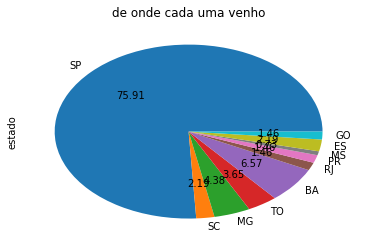

In [428]:
estados = tortas_es.idx["estado"]
estados.plot(kind="pie", autopct="%.2f", legend=False)
plt.title("de onde cada uma venho")

In [429]:
eng["ESTADO/CID"].value_counts()

São Paulo SP                61
Campinas SP                  3
Sorocaba SP                  3
Guarulhos SP                 2
Rio de Janeiro RJ            2
Santos SP                    2
Salvador BA                  1
Matão SP                     1
Cotia SP                     1
Porto Alegre RS              1
São Pailo SP                 1
Dracena  SP                  1
SC                           1
Mauá SP                      1
Goiania GO                   1
Guaratinguetá SP             1
Louveira SP                  1
Diadema SP                   1
São José do Rio Preto SP     1
Belo Horizonte MG            1
Barueri SP                   1
Indaiatuba SP                1
Vitória ES                   1
Itanhandu MG                 1
SBC SP                       1
São Bernardo do Campo Sp     1
ão Pualo SP                  1
Paraisópolis MG              1
Governador Valadares MG      1
São Pualo SP                 1
Campo Grande MS              1
São José do Rio Pardo SP     1
São Bern

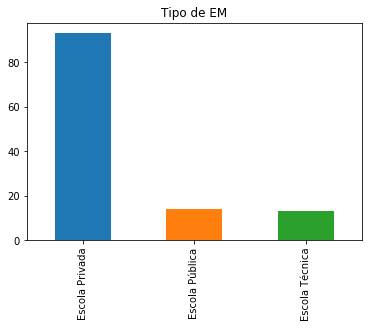

In [430]:
eng.TIPO_EM.value_counts().plot.bar()
plt.title("Tipo de EM");

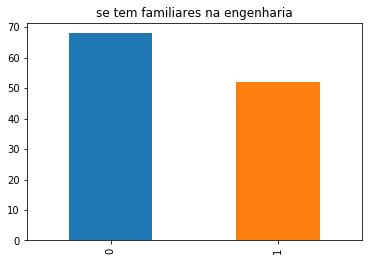

In [431]:
eng["Algum familiar trabalha na área de engenharia?"].value_counts().plot.bar()
plt.title("se tem familiares na engenharia");

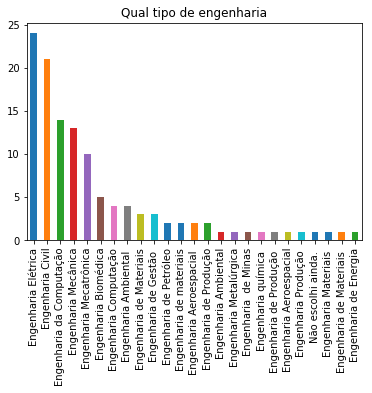

In [432]:
eng["TIPO_ENG"].value_counts().plot.bar()
plt.title("Qual tipo de engenharia");

Limpeza da Coluna de quais familiares na engenharia

In [433]:
mae = 0
maeL =[]

avos = 0
avosL =[]

pai = 0
paiL =[]

tio = 0
tioL=[]

irmaos =0
irmaosL =[]

ninguem = 0
ninguemL =[]

padrasto = 0
padrastoL=[]

primos = 0
primosL=[]

for k in eng['Se SIM na pergunta anterior,  quais familiares?']:
    split_v = k.split(",")
    for i in split_v:
        split_e = i.split(" e")
    
    for k in split_e:
        if k == "pai" or k =="Pai" or k == "Meu pai" or k =="pai e mãe ":
            pai+=1
            paiL.append("pai")
        elif k == " mãe " or k == "Mãe" or k == "pai e mãe ":
            mae+=1
            maeL.append("mae")
        elif k =="irmã " or k ==" meu irmão" or k ==" irmão" :
            irmaos+=1
            irmaosL.append("irmao")
        elif k ==" tio." or k ==" tios" or k =="Tios" or k ==" tio":
            tio+=1
            tioL.append("tio")
        elif "padrasto" in k.lower():
            padrasto+=1
            padrastoL.append("padrasto")
        elif "ninguém" in k.lower():
            ninguem+=1
            ninguemL.append("ninguem")
        elif "avô" in k.lower() or k==" avô":
            avos+=1
            avosL.append("avos")
        elif k ==" primos" or k =='Primo' or k==' primas' or k==" primo" or k==' primos ' or k=="Dois primos":
            primos +=1
            primosL.append("primos")
    


Text(0.5,1,'Familiares na Engenharia')

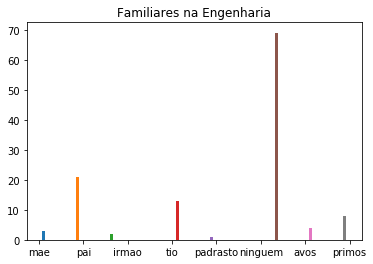

In [434]:
familia =[]
familia.append(maeL)
familia.append(paiL)
familia.append(irmaosL)
familia.append(tioL)
familia.append(padrastoL)
familia.append(ninguemL)
familia.append(avosL)
familia.append(primosL)
plt.hist(familia);
plt.title('Familiares na Engenharia')

Text(0.5,1,'Estuda no Insper')

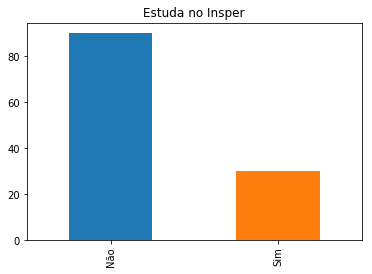

In [435]:
eng["Fez Insper?"].value_counts().plot.bar()
plt.title("Estuda no Insper")

#  2a Análise: Faz Engenharia ou Adm/Eco no Insper?

# PRIMEIRO SHEET: meninas na engenharia Insper

In [436]:
# leitura do excel
eng_insper_2 = pd.read_excel('PESQUISA.xlsx', sheet_name = 0)

In [437]:
#renomeando colunas:
eng_insper_2 = eng_insper_2.rename(columns={"Qual seu nome completo?": "NOME", "Qual semestre?": "SEMESTRE", "Idade": "IDADE", "Qual engenharia?": "Curso", "De onde você veio (cidade/estado)?": "ESTADO/CID", "Frequentou o Ensino Médio...":"TIPO_EM", "Qual o nome do seu colégio?": "NOME_EM",  'Algum familiar trabalha na área de engenharia?':'Familiar na área?',  'Se SIM na pergunta anterior,  quais familiares?':'Quais familiares?', 'Engenharia foi sua 1a escolha?':'Seu curso foi sua 1a escolha?','Por que escolheu Engenharia?':'Por que escolheu este curso ?'})

#limpeza e modificações
semestre=[]

for k in eng_insper_2.SEMESTRE:
    if k == "2º Semestre":
        semestre.append(2)
    elif k == "3º Semestre":
        semestre.append(3)
    elif k == "4º Semstre":
        semestre.append(4)
    elif k =="5º Semestre":
        semestre.append(5)
    elif k =="6º semestre":
        semestre.append(6)
    elif k == "7º Semestre":
        semestre.append(7)
    else:
         semestre.append(8)
            
eng_insper_2.SEMESTRE = semestre

eng_insper_2['Se "Não", qual?'] = eng_insper_2['Se "Não", qual?'].fillna('Insper')

eng_insper_2['Faz Engenharia?']= '1'

eng_insper_2['Quais familiares?'] = eng_insper_2['Quais familiares?'].fillna('Ninguém')


In [438]:
eng_insper_2_idx=eng_insper_2.set_index('NOME')

## QUARTO SHEET: adm/econo insper


Lendo arquivo Excel

In [439]:
insper = pd.read_excel('PESQUISA.xlsx', sheet_name = 3)

In [440]:
insper = insper.drop('Qual é a distância da sua casa para a faculdade', 1)

Limpar o DataFrame e Renomear algumas colunas

In [441]:
insper['Se "Não", qual?'] = insper['Se "Não", qual?'].fillna('Insper')
insper = insper.rename(columns={"Qual seu nome completo?": "NOME", "Qual semestre?": "SEMESTRE", "Idade": "IDADE", "Qual curso?": "Curso", "De onde você veio (cidade/estado)?": "ESTADO/CID", "Frequentou o Ensino Médio...":"TIPO_EM", "Qual o nome do seu colégio?": "NOME_EM", 'Algum familiar trabalha na área de adm e/ou econo?': 'Familiar na área?', 'Se SIM na pergunta anterior, quais familiares?':'Quais Familiares?', 'Adm e/ou Econo foi sua primeira escolha?':'Seu curso foi sua 1a escolha?','Por que escolheu Administração/ Economia?': 'Por que escolheu este curso?'})
semestre=[]

for k in insper.SEMESTRE:
    if k == "2º Semestre":
        semestre.append(2)
    elif k == "3º Semestre":
        semestre.append(3)
    elif k == "4º Semstre":
        semestre.append(4)
    elif k =="5º Semestre":
        semestre.append(5)
    elif k =="6º semestre":
        semestre.append(6)
    elif k == "7º Semestre":
        semestre.append(7)
    else:
         semestre.append(8)
            
insper.SEMESTRE = semestre

In [442]:
insper_idx=insper.set_index('NOME')

In [443]:
#insper_idx.columns.tolist()

In [444]:
insper_idx['Faz Engenharia?']='0'

##### Juntando os DataFrames

In [445]:
#Conferir o número de colunas em cada DataFrame
print(len(eng_insper_2_idx.columns.tolist()))
print(len(insper_idx.columns.tolist()))

19
21


In [446]:
Insper=pd.concat([eng_insper_2, insper_idx])
Insper.head(1)

C:\Users\Beatriz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,Algum familiar na engenharia?,Com quantos anos você espera se aposentar?,Como descobriu o Insper?,Curso,ESTADO/CID,Familiar na área?,Faz Engenharia?,IDADE,Insper foi sua 1a opcao?,NOME,...,Quanto você espera ganhar no seu início de sua carreira?,SEMESTRE,"Se ""Não"", qual?","Se ""Sim"" na pergunta anterior, quais familiares?","Se SIM na pergunta anterior, quais familiares?",Seu curso foi sua 1a escolha?,TIPO_EM,Ter poucas meninas na engenharia te desmotiva a ingressar na engenharia?,Ter poucas meninas no Insper te desmotiva a ingressar na instituição?,Você pretende ter filhos?
0,NaN,Entre 62 a 65 anos,Por amigos,Engenharia Mecatrônica,Osasco SP,0,1,Entre 19 a 21 anos,1,Vitória de Almeida Oliveira,...,R$ 15000 - R$ 20000,2,Insper,NaN,NaN,1,Escola Privada,1.0,NaN,0


###  Análise explorátoria 2.0

Text(0.5,1,'se tem familiares na área')

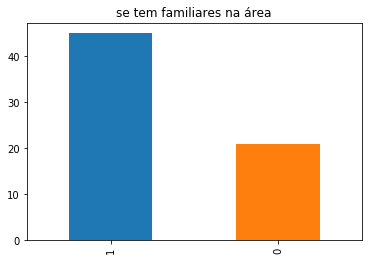

In [447]:
Insper["Familiar na área?"].value_counts().plot.bar()
plt.title("se tem familiares na área")

Text(0.5,1,'Qual tipo de curso?')

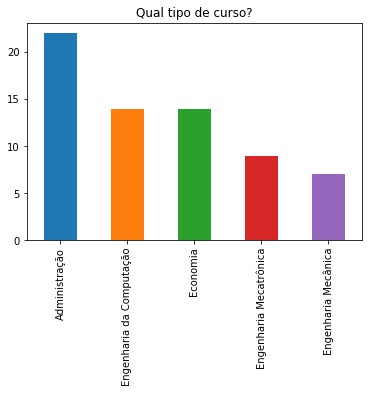

In [448]:
Insper['Curso'].value_counts().plot.bar()
plt.title("Qual tipo de curso?")

In [449]:
pai = len(eng[eng['Se SIM na pergunta anterior,  quais familiares?'].str.contains('Pai', case=False)])
print(pai)

32


In [450]:
tio = len((eng[eng['Se SIM na pergunta anterior,  quais familiares?'].str.contains('tios', case=False)]))
print((tio))

7


In [451]:
mae = len(eng[eng['Se SIM na pergunta anterior,  quais familiares?'].str.contains('mãe|mae', case=False)])
print(mae)

8


In [452]:
irmaos = len(eng[eng['Se SIM na pergunta anterior,  quais familiares?'].str.contains('irmã|irmão|irma|irmao', case=False)])
print(irmaos)

12


In [453]:
padrasto = len(eng[eng['Se SIM na pergunta anterior,  quais familiares?'].str.contains('padrasto', case=False)])
print(padrasto)

2


In [454]:
ninguem = len(eng[eng['Se SIM na pergunta anterior,  quais familiares?'].str.contains('ninguém', case=False)])
print(ninguem)

69


In [455]:
avos = len(eng[eng['Se SIM na pergunta anterior,  quais familiares?'].str.contains('avô|avo', case=False)])
print(avos)

6


In [456]:
primos = len(eng[eng['Se SIM na pergunta anterior,  quais familiares?'].str.contains('primos|prima|primo', case=False)])
print(primos)

8


In [457]:
soma = primos+ avos+ ninguem + padrasto+ irmaos+ mae+ tio+pai
soma

144

In [458]:
print ("a probabilidade de ter uma mãe que trabalha na engenharia é  {:.2f}%".format((mae/soma)*100))
print ("a probabilidade de ter um pai que trabalha na engenharia é {:.2f}%".format((pai/soma)*100))
print ("a probabilidade de ter um tio que trabalha na engenharia é {:.2f}%".format((tio/soma)*100))
print ("a probabilidade de ter um irmão que trabalha na engenharia é {:.2f}%".format((irmaos/soma)*100))
print ("a probabilidade de ter um padrasto que trabalha na engenharia é {:.2f}%".format((padrasto/soma)*100))
print ("a probabilidade de ter um ninguém que trabalha na engenharia é {:.2f}%".format((ninguem/soma)*100))
print ("a probabilidade de ter um avô ou uma avó que trabalha na engenharia é {:.2f}%".format((avos/soma)*100))
print ("a probabilidade de ter um primo ou uma prima que trabalha na engenharia é {:.2f}%".format((primos/soma)*100))

a probabilidade de ter uma mãe que trabalha na engenharia é  5.56%
a probabilidade de ter um pai que trabalha na engenharia é 22.22%
a probabilidade de ter um tio que trabalha na engenharia é 4.86%
a probabilidade de ter um irmão que trabalha na engenharia é 8.33%
a probabilidade de ter um padrasto que trabalha na engenharia é 1.39%
a probabilidade de ter um ninguém que trabalha na engenharia é 47.92%
a probabilidade de ter um avô ou uma avó que trabalha na engenharia é 4.17%
a probabilidade de ter um primo ou uma prima que trabalha na engenharia é 5.56%


In [459]:
pie = []
pie.append(mae)
pie.append(pai)
pie.append(tio)
pie.append(irmaos)
pie.append(padrasto)
pie.append(ninguem)
pie.append(avos)
pie.append(primos)

nomes =[]
nomes.append("mae")
nomes.append("pai")
nomes.append("tio")
nomes.append("irmaos")
nomes.append("padrasto")
nomes.append("ninguem")
nomes.append("avos")
nomes.append("primos")

pies = pd.DataFrame()
pies["quem"]= nomes
pies["porcentagem de familia"] = pie

pies_idx = pies.set_index("quem")
pies_idx

,porcentagem de familia
quem,
mae,8
pai,32
tio,7
irmaos,12
padrasto,2
ninguem,69
avos,6
primos,8


Text(0.5,1,'porcentagem da familia em engenharia')

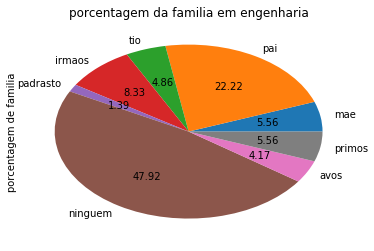

In [460]:
adim = pies_idx["porcentagem de familia"]
adim.plot(kind="pie", autopct="%.2f", legend=False)
plt.title("porcentagem da familia em engenharia")

## PRIMEIRA REGRESSÃO

In [461]:
minas = pd.read_excel('PESQUISA.xlsx', sheet_name = 4)

In [462]:
minas_idx = minas.set_index("ENGENHARIAS")
minas_idx["_2019"] = 0
minas_idx

,_2015,_2016,_2017,_2018,_2019
ENGENHARIAS,,,,,
mecatrônica,2,1,8,6,0
computação,2,5,4,7,0
mecânica,4,1,3,4,0


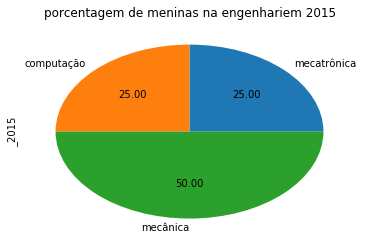

In [463]:
pie2015 = minas_idx["_2015"]
pie2015.plot(kind="pie", autopct="%.2f", legend=False);
plt.title("porcentagem de meninas na engenhariem 2015");

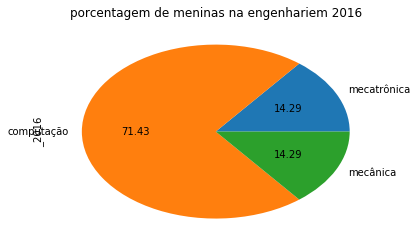

In [464]:
pie2016 = minas_idx["_2016"]
pie2016.plot(kind="pie", autopct="%.2f", legend=False)
plt.title("porcentagem de meninas na engenhariem 2016");

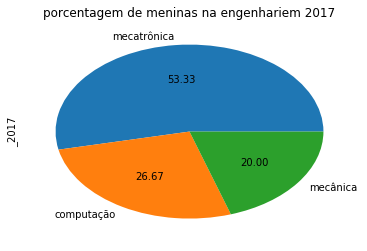

In [465]:
pie2017 = minas_idx["_2017"]
pie2017.plot(kind="pie", autopct="%.2f", legend=False)
plt.title("porcentagem de meninas na engenhariem 2017");

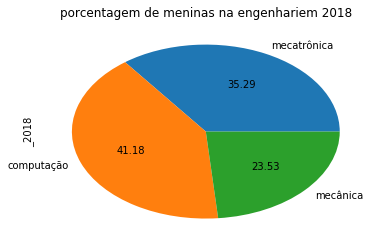

In [466]:
pie2018 = minas_idx["_2018"]
pie2018.plot(kind="pie", autopct="%.2f", legend=False)
plt.title("porcentagem de meninas na engenhariem 2018");

In [467]:
def regress(X, Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y, X_cp)
    results= model.fit()
    return results

In [468]:
quanti = minas_idx[["_2015", "_2016","_2017"]]
quanti_x = quanti.copy()
reg = regress(quanti_x, minas_idx["_2018"])
reg.summary()

C:\Users\Beatriz\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)
C:\Users\Beatriz\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1549: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Beatriz\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1550: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
C:\Users\Beatriz\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1558: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
C:\Users\Beatriz\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  _2018   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Thu, 22 Nov 2018   Prob (F-statistic):                nan
Time:                        10:18:46   Log-Likelihood:                 96.927
No. Observations:                   3   AIC:                            -187.9
Df Residuals:                       0   BIC:                            -190.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1588        inf          0        nan         nan         nan
_2015          0.3556        inf          0        nan         nan         nan
_2016          0.7922        inf          0        nan         nan         nan
_2017          0.5422        inf          0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.623
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.281
Skew:                           0.000   Prob(JB):                        0.869
Kurtosis:                       1.500   Cond. No.                         4.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
"""

In [469]:
Insper_mist=Insper.sample(66, replace = False)
Insper_mist

,Algum familiar na engenharia?,Com quantos anos você espera se aposentar?,Como descobriu o Insper?,Curso,ESTADO/CID,Familiar na área?,Faz Engenharia?,IDADE,Insper foi sua 1a opcao?,NOME,...,Quanto você espera ganhar no seu início de sua carreira?,SEMESTRE,"Se ""Não"", qual?","Se ""Sim"" na pergunta anterior, quais familiares?","Se SIM na pergunta anterior, quais familiares?",Seu curso foi sua 1a escolha?,TIPO_EM,Ter poucas meninas na engenharia te desmotiva a ingressar na engenharia?,Ter poucas meninas no Insper te desmotiva a ingressar na instituição?,Você pretende ter filhos?
6,NaN,Entre 62 a 65 anos,"Por amigos, Por família",Engenharia Mecatrônica,São Paulo SP,1,1,Entre 19 a 21 anos,0,Roberta Thome,...,R$ 5000 - R$ 10000,2,Unicamp,NaN,NaN,0,Escola Privada,1.0,NaN,1
Gabriela Moscarella Camillo,Sim,Entre 62 a 65 anos,Feira de Universidades/ Faculdades,Administração,São Paulo SP,1,0,Entre 16 a 18 anos,1,NaN,...,R$ 10000 - R$ 15000,8,Insper,pai e mae,prima de segundo grau,1,Escola Privada,NaN,0.0,1
24,NaN,Acima de 70 anos,Por amigos,Engenharia da Computação,São Paulo SP,1,1,Entre 16 a 18 anos,1,Gabriela Iannini Caruso,...,R$ 10000 - R$ 15000,2,Insper,NaN,NaN,1,Escola Privada,0.0,NaN,1
Ana Beatriz Lie Yoshida,Sim,Entre 62 a 65 anos,"Por amigos, Por família",Administração,Mogi das Cruzes SP,1,0,Entre 16 a 18 anos,1,NaN,...,R$ 5000 - R$ 10000,8,Insper,tio,"Familia paterna inteira, mãe e irmã",1,Escola Privada,NaN,0.0,1
Leticia amaral santos,NaN,Entre 65 a 70 anos,Por amigos,Economia,Belo Horizonte MG,1,0,Entre 19 a 21 anos,1,NaN,...,R$ 5000 - R$ 10000,2,Insper,NaN,Pai,1,Escola Privada,NaN,0.0,1
Manuela Faria,Sim,Entre 65 a 70 anos,"Por amigos, Por família, Influencia da Escola",Economia,São Paulo SP,0,0,Entre 16 a 18 anos,1,NaN,...,R$ 5000 - R$ 10000,8,Insper,Pai,NaN,1,Escola Privada,NaN,0.0,1
Daniela Abuhab,NaN,Acima de 70 anos,Influencia da Escola,Administração,São Paulo SP,1,0,Entre 19 a 21 anos,0,NaN,...,R$ 5000 - R$ 10000,4,Fea,NaN,Pai e tios,1,Escola Privada,NaN,0.0,0
26,NaN,Entre 65 a 70 anos,Por família,Engenharia Mecatrônica,Curitiba PR,1,1,Entre 16 a 18 anos,1,Mayra Peter da Rocha Loures,...,R$ 5000 - R$ 10000,2,Insper,NaN,NaN,1,Escola Privada,0.0,NaN,1
Tatiana shayo,Não,Acima de 70 anos,"Por amigos, Por família, Influencia da Escola,...",Administração,São Paulo SP,1,0,Entre 19 a 21 anos,0,NaN,...,R$ 5000 - R$ 10000,4,Gv,NaN,"Pai, irmao e irma",1,Escola Privada,NaN,0.0,1
23,NaN,Entre 65 a 70 anos,Influência do ISMART(bolsa que eu tinha no EM),Engenharia da Computação,Sorocaba SP,0,1,Entre 19 a 21 anos,1,Bruna Mayumi Kimura,...,R$ 5000 - R$ 10000,8,Insper,NaN,NaN,0,Escola Privada,1.0,NaN,1


In [470]:
Insper_mist.shape

(66, 25)

In [471]:
teste = Insper_mist[:33]
treinamento= Insper_mist[33:]

In [472]:
X_train = (treinamento['Faz Engenharia?']=='1')
X_test = (teste['Faz Engenharia?']=='1')
y_train = (treinamento['Faz Engenharia?']=='1')
y_teste = (teste['Faz Engenharia?']=='1')

In [473]:
X = Insper_mist
X.drop('Faz Engenharia?', 1)
y = Insper_mist['Faz Engenharia?']
RANDOM_SEED = 42 # faz um random no DataFrame

In [474]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= RANDOM_SEED)

### Inicio Regressão Logística

Text(0.5,1,'Função Logística')

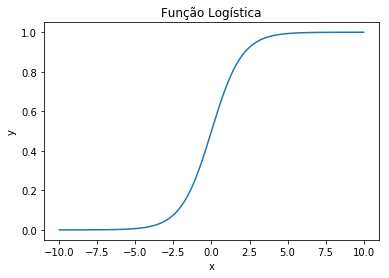

In [475]:
x_logistica = np.linspace(-10, 10, 500)
y_logistica = 1/(1 + np.exp(-x_logistica))

plt.plot(x_logistica, y_logistica)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Função Logística')

In [476]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Acurácia: {}'.format(accuracy_score(y_test, y_pred)))

ValueError: could not convert string to float: 'Escola Privada'

In [ ]:
pd.Series(y_pred).value_counts()

In [ ]:
# Testa modelo.
y_pred = model.predict(X_test)

# Calcula acurácia.
acc = accuracy_score(y_test, y_pred)

print("Acurácia: {}".format(acc))

In [ ]:
n = 20

for original, binarized in zip(teste["Faz Engenharia?"][:n], y_train[:n]):
    print('{} -> {}'.format(original, binarized))

In [ ]:
teste_array = treinamento["Faz Engenharia?"].values.reshape(1, -1) 

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1, tol=None, random_state=RANDOM_SEED)  # Existe aleatoriedade dentro do SGDClassifier.
sgd_clf.fit(X_train, y_train)

In [ ]:
y_pred_mist = sgd_clf.predict(X_test)
print(y_pred_mist)
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred_mist)))

# Bibliografia:

* pd.concat:
https://stackoverflow.com/questions/21435176/appending-two-dataframes-with-same-columns-different-order

* como fazer um random no DataFrame:
https://pt.stackoverflow.com/questions/324588/fazer-um-random-de-um-dataset-com-pandas